In [1]:
import os
import sys 
from pyprojroot import here
sys.path.insert(0, str(here()))

import geopandas as gpd
from laos_gggi.data_functions import load_emdat_data, load_shapefile, load_rivers_data
from laos_gggi.data_functions.combine_data import load_all_data
from laos_gggi.data_functions.disaster_point_data import load_disaster_point_data
from laos_gggi.plotting import configure_plot_style
from laos_gggi.statistics import get_distance_to_rivers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

configure_plot_style()

In [2]:
data = load_disaster_point_data()

In [3]:
world = load_shapefile('world')
laos = load_shapefile('laos')
coastline = load_shapefile('coastline')
rivers = load_rivers_data()

<Axes: >

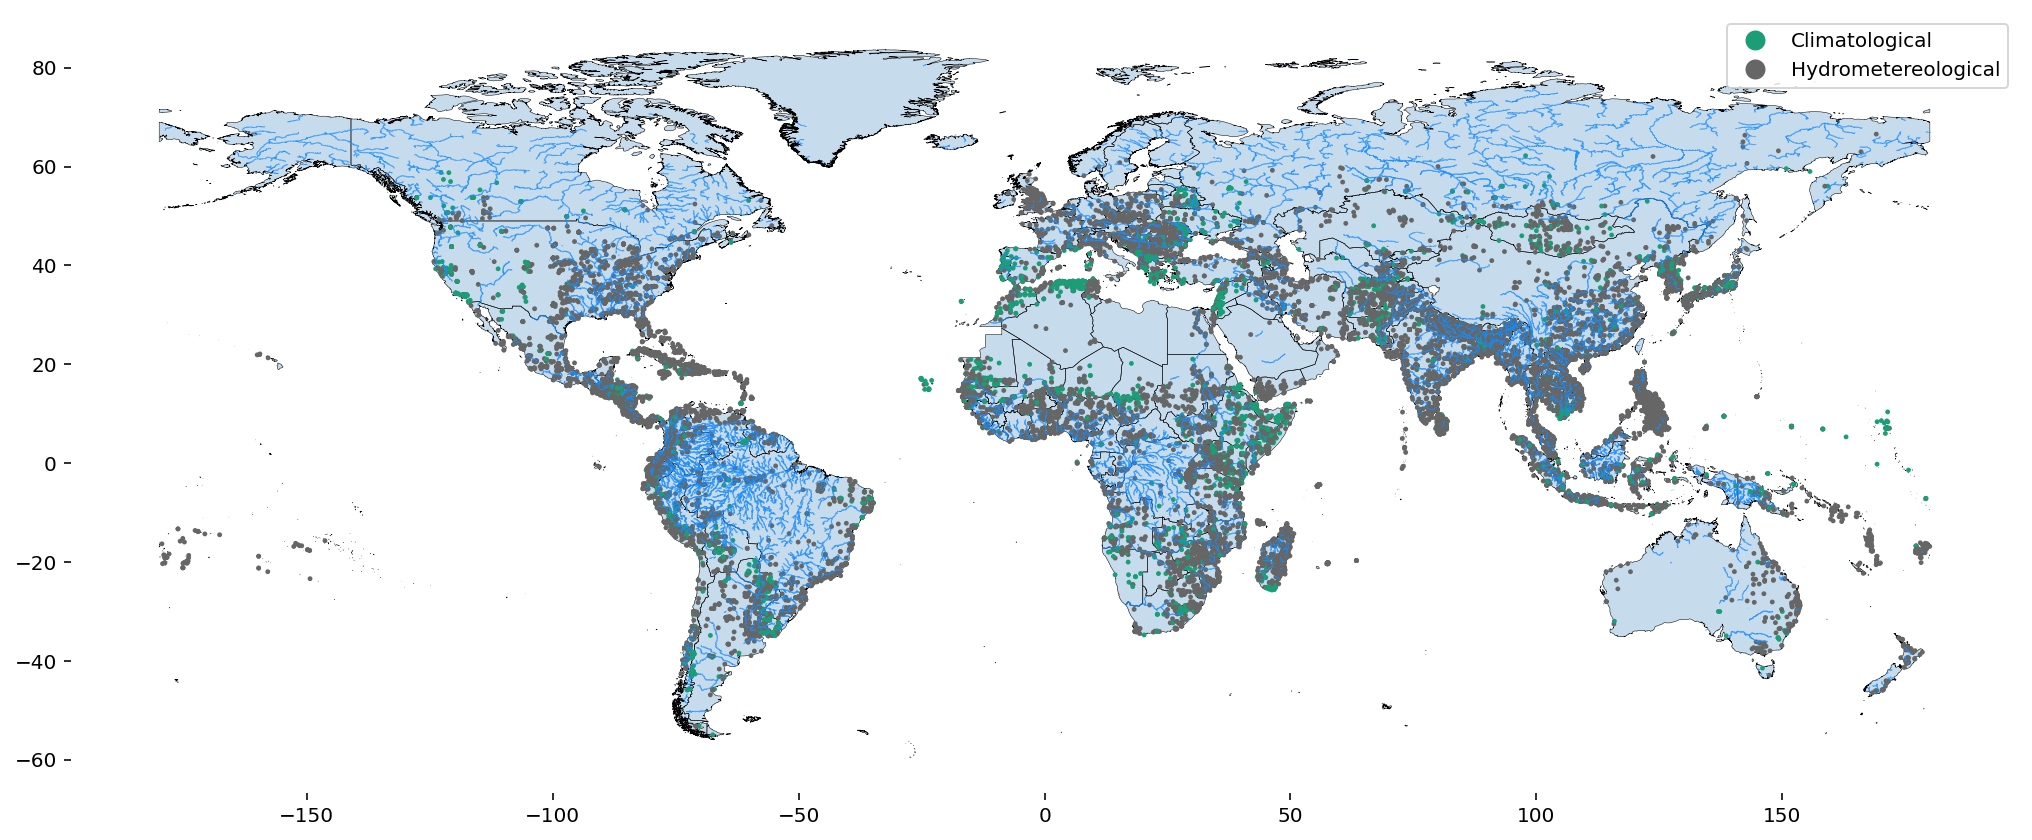

In [4]:
fig, ax = plt.subplots(figsize=(14, 9), dpi=144)
world.plot(facecolor='tab:blue', alpha=0.25, ax=ax)
world.plot(facecolor='none', edgecolor='k', lw=0.25, ax=ax)
rivers.plot(edgecolor='dodgerblue', lw=0.5, ax=ax)
data.dropna(subset='disaster_class').plot('disaster_class', markersize=2, ax=ax, legend=True, cmap='Dark2')

<Axes: ylabel='Frequency'>

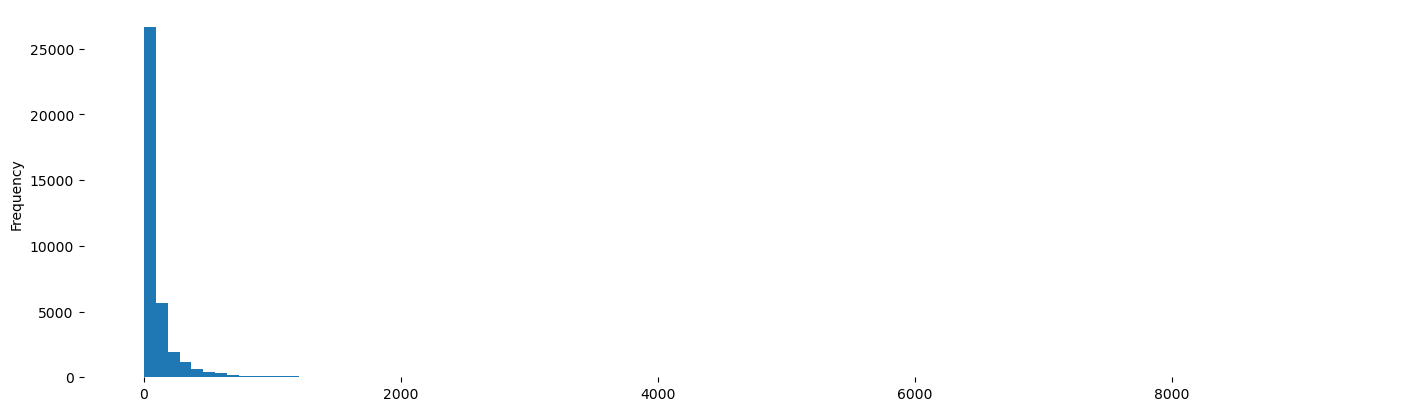

In [5]:
data.distance_to_river.plot.hist(bins=100)

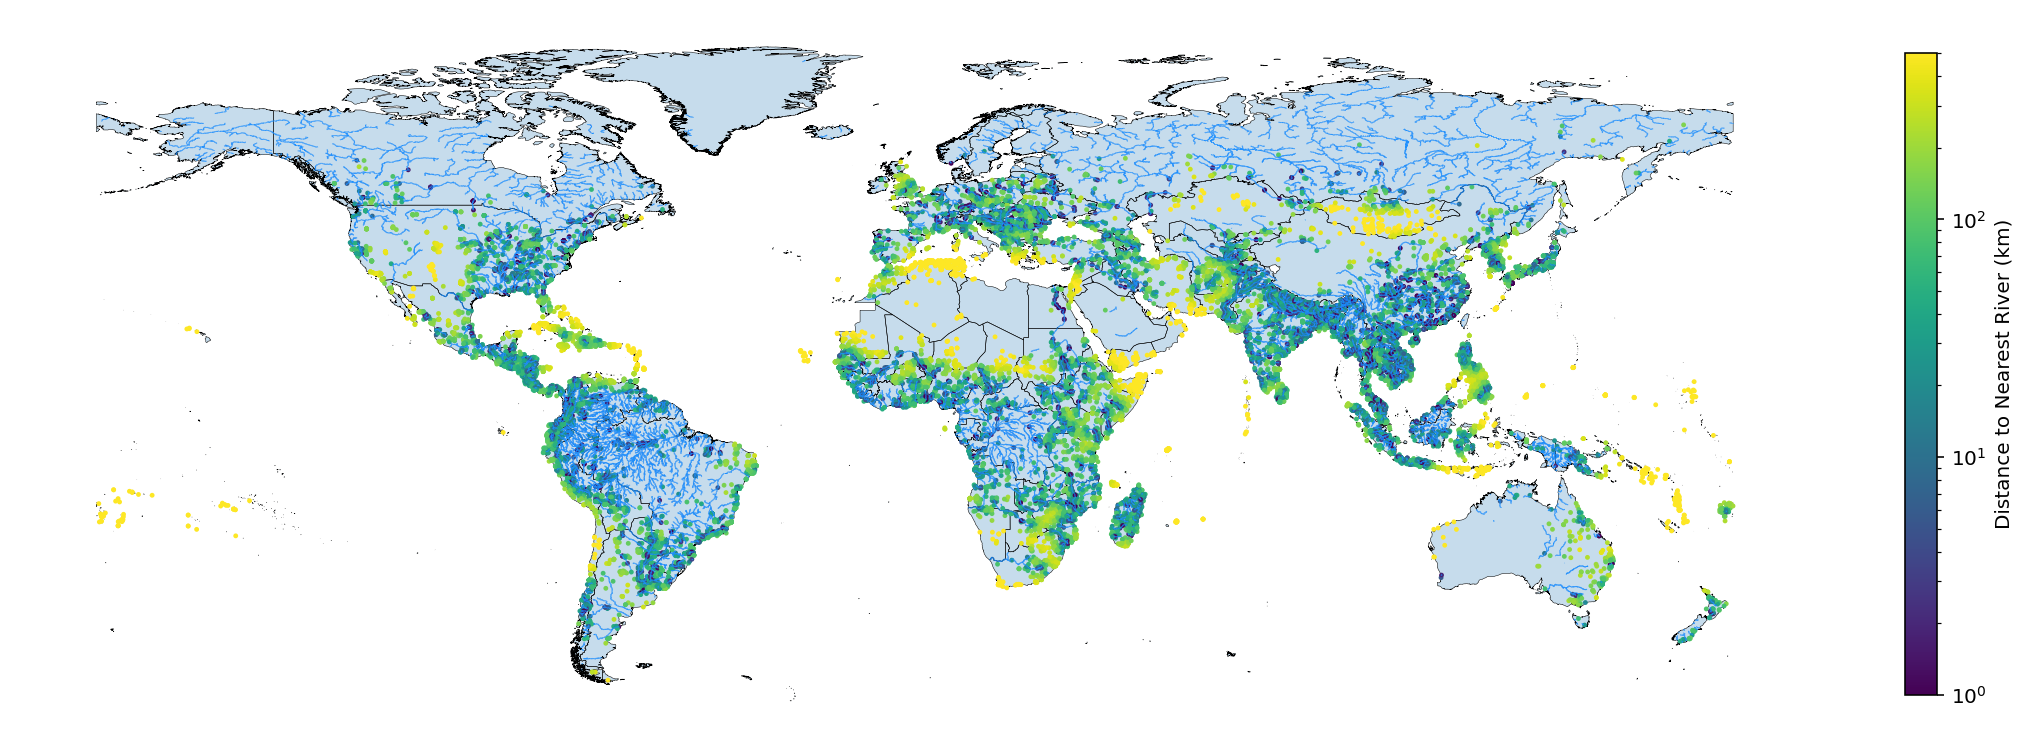

In [6]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(14, 9), dpi=144)
world.plot(facecolor='tab:blue', alpha=0.25, ax=ax)
world.plot(facecolor='none', edgecolor='k', lw=0.25, ax=ax)
rivers.plot(edgecolor='dodgerblue', lw=0.5, ax=ax)
data.dropna(subset='disaster_class').plot('distance_to_river', 
                                      markersize=2, 
                                      ax=ax, 
                                      legend=True, 
                                      cmap='viridis',
                                      norm=LogNorm(vmin=1, vmax=500),
                                      vmax=500, 
                                      legend_kwds={'shrink':0.5, 'label':'Distance to Nearest River (km)'})
ax.axis('off')
plt.show()

<Axes: ylabel='Frequency'>

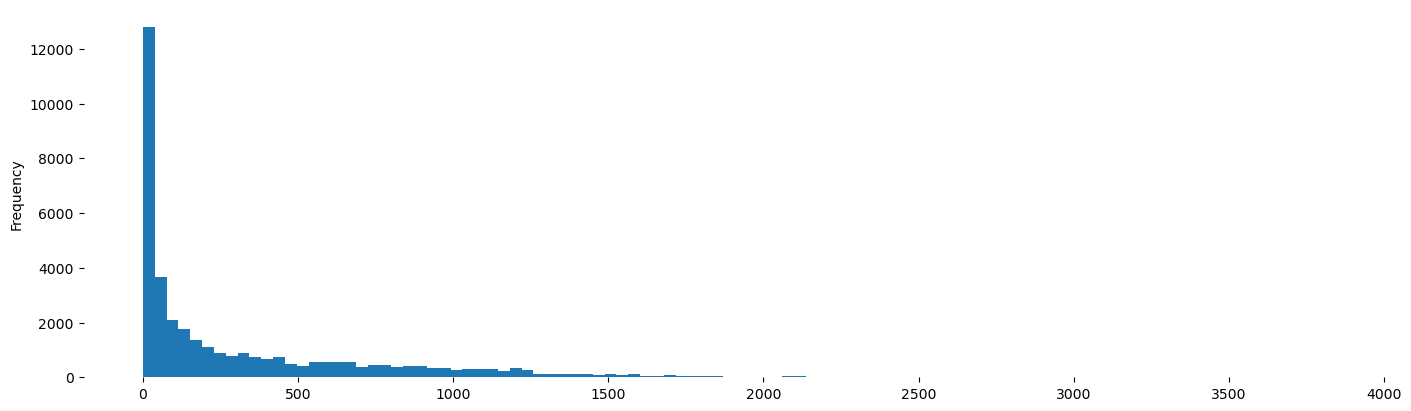

In [7]:
data.distance_to_coastline.plot.hist(bins=100)

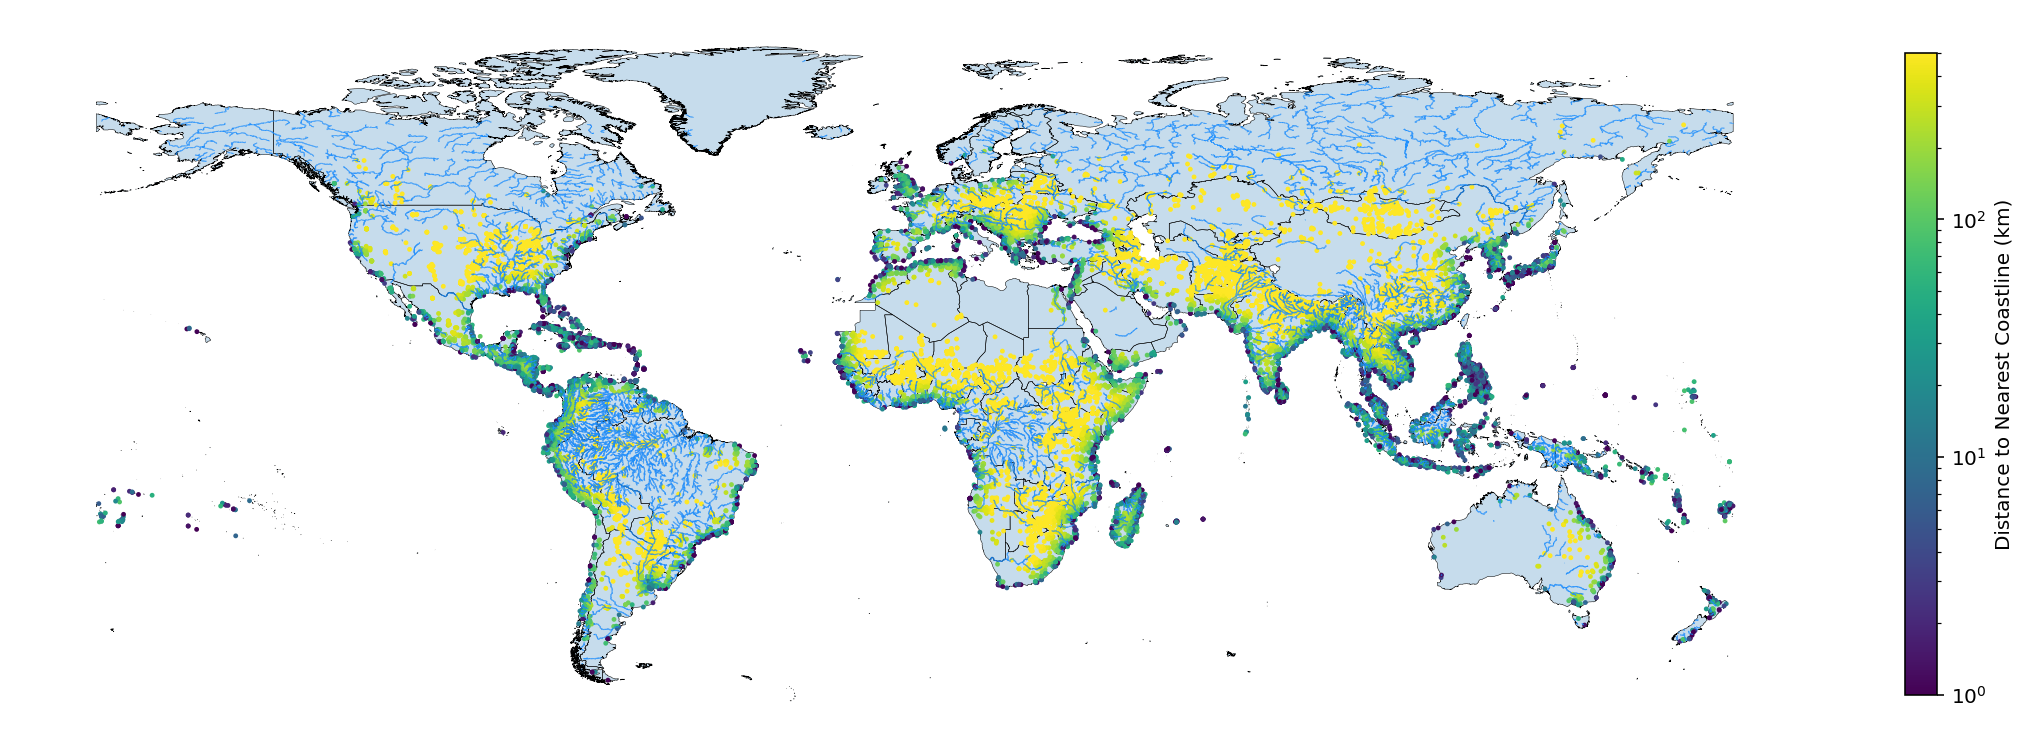

In [8]:
fig, ax = plt.subplots(figsize=(14, 9), dpi=144)
world.plot(facecolor='tab:blue', alpha=0.25, ax=ax)
world.plot(facecolor='none', edgecolor='k', lw=0.25, ax=ax)
rivers.plot(edgecolor='dodgerblue', lw=0.5, ax=ax)
data.dropna(subset='disaster_class').plot('distance_to_coastline', 
                                      markersize=2, 
                                      ax=ax, 
                                      legend=True, 
                                      cmap='viridis',
                                      norm=LogNorm(vmin=1, vmax=500),
                                      vmax=500,
                                      legend_kwds={'shrink':0.5, 'label':'Distance to Nearest Coastline (km)'})
ax.axis('off')
plt.show()

<Axes: ylabel='Frequency'>

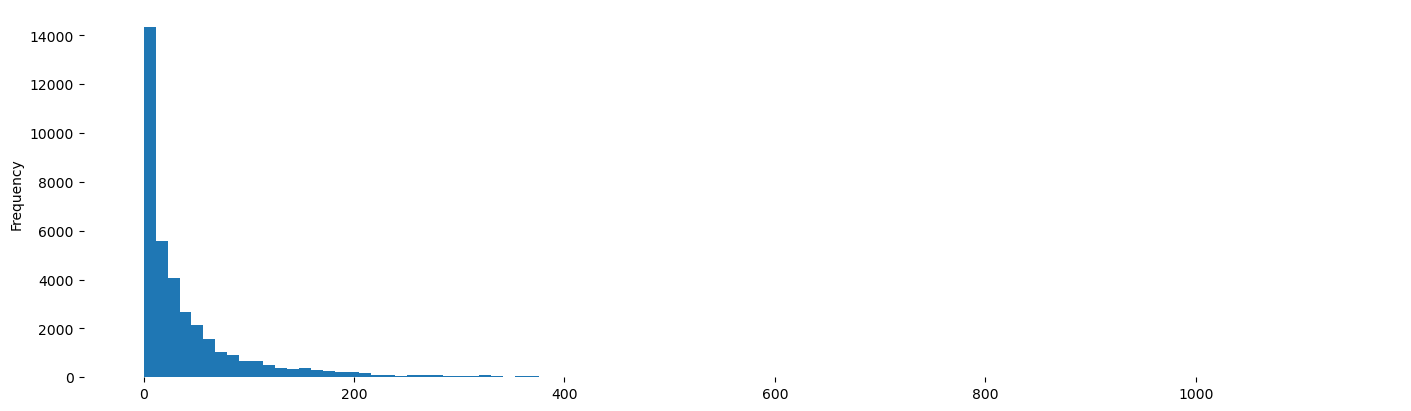

In [9]:
data.distance_to_water.plot.hist(bins=100)

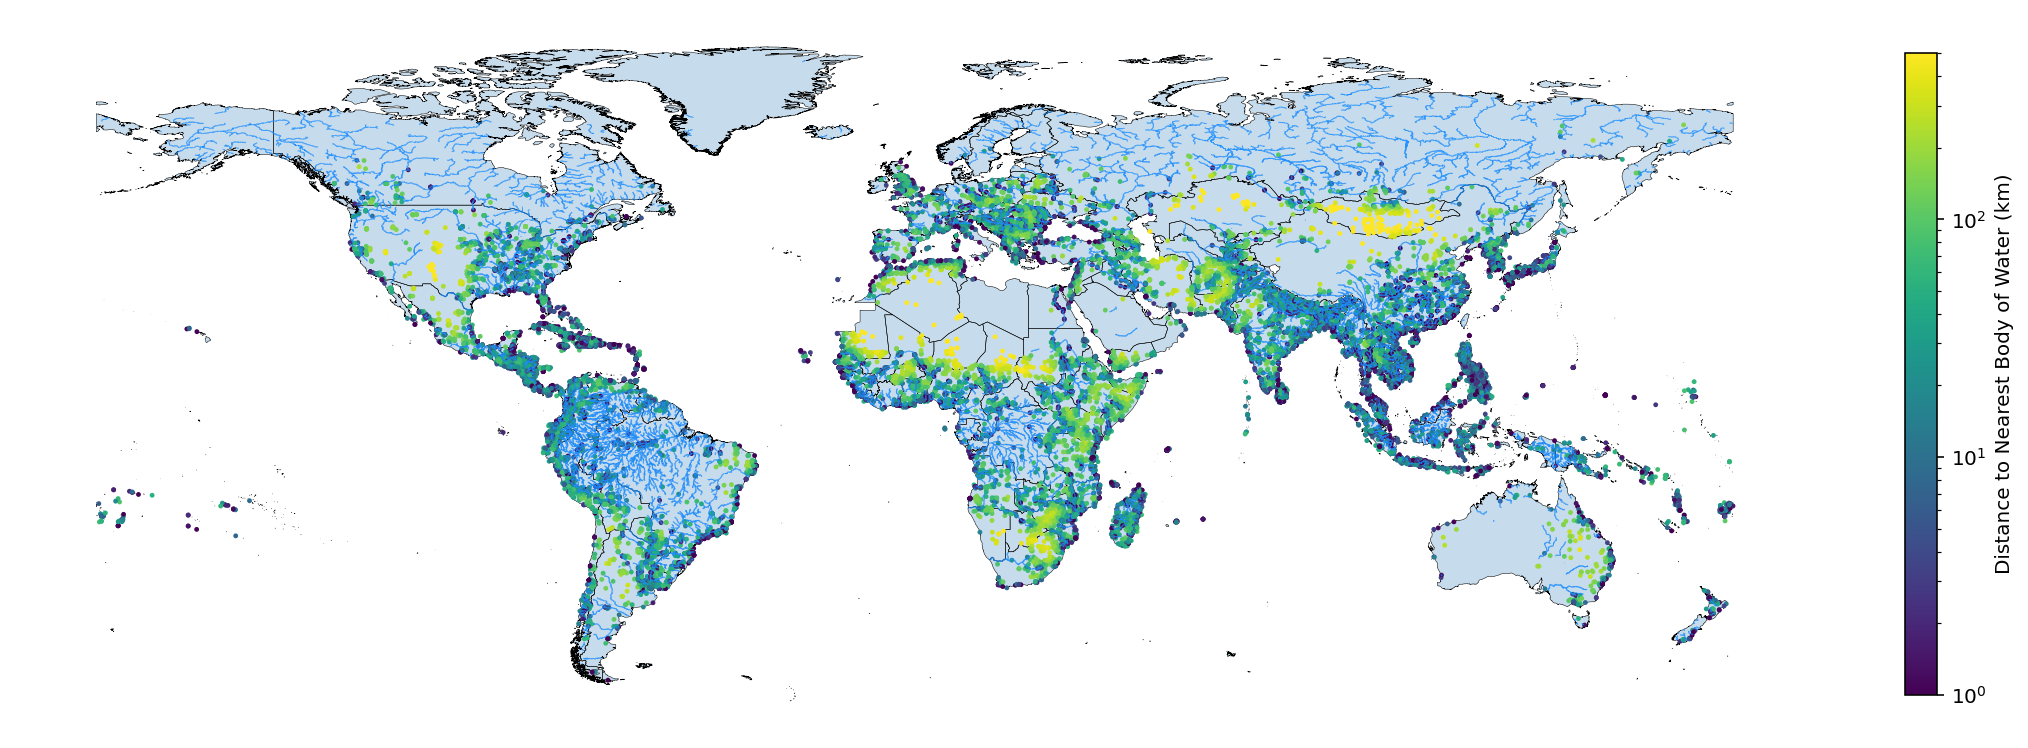

In [10]:
fig, ax = plt.subplots(figsize=(14, 9), dpi=144)
world.plot(facecolor='tab:blue', alpha=0.25, ax=ax)
world.plot(facecolor='none', edgecolor='k', lw=0.25, ax=ax)
rivers.plot(edgecolor='dodgerblue', lw=0.5, ax=ax)
data.dropna(subset='disaster_class').plot('distance_to_water', 
                                      markersize=2, 
                                      ax=ax, 
                                      legend=True, 
                                      cmap='viridis', 
                                      norm=LogNorm(vmin=1, vmax=500),
                                      vmax=500, 
                                      legend_kwds={'shrink':0.5, 'label':'Distance to Nearest Body of Water (km)'})
ax.axis('off')
plt.show()

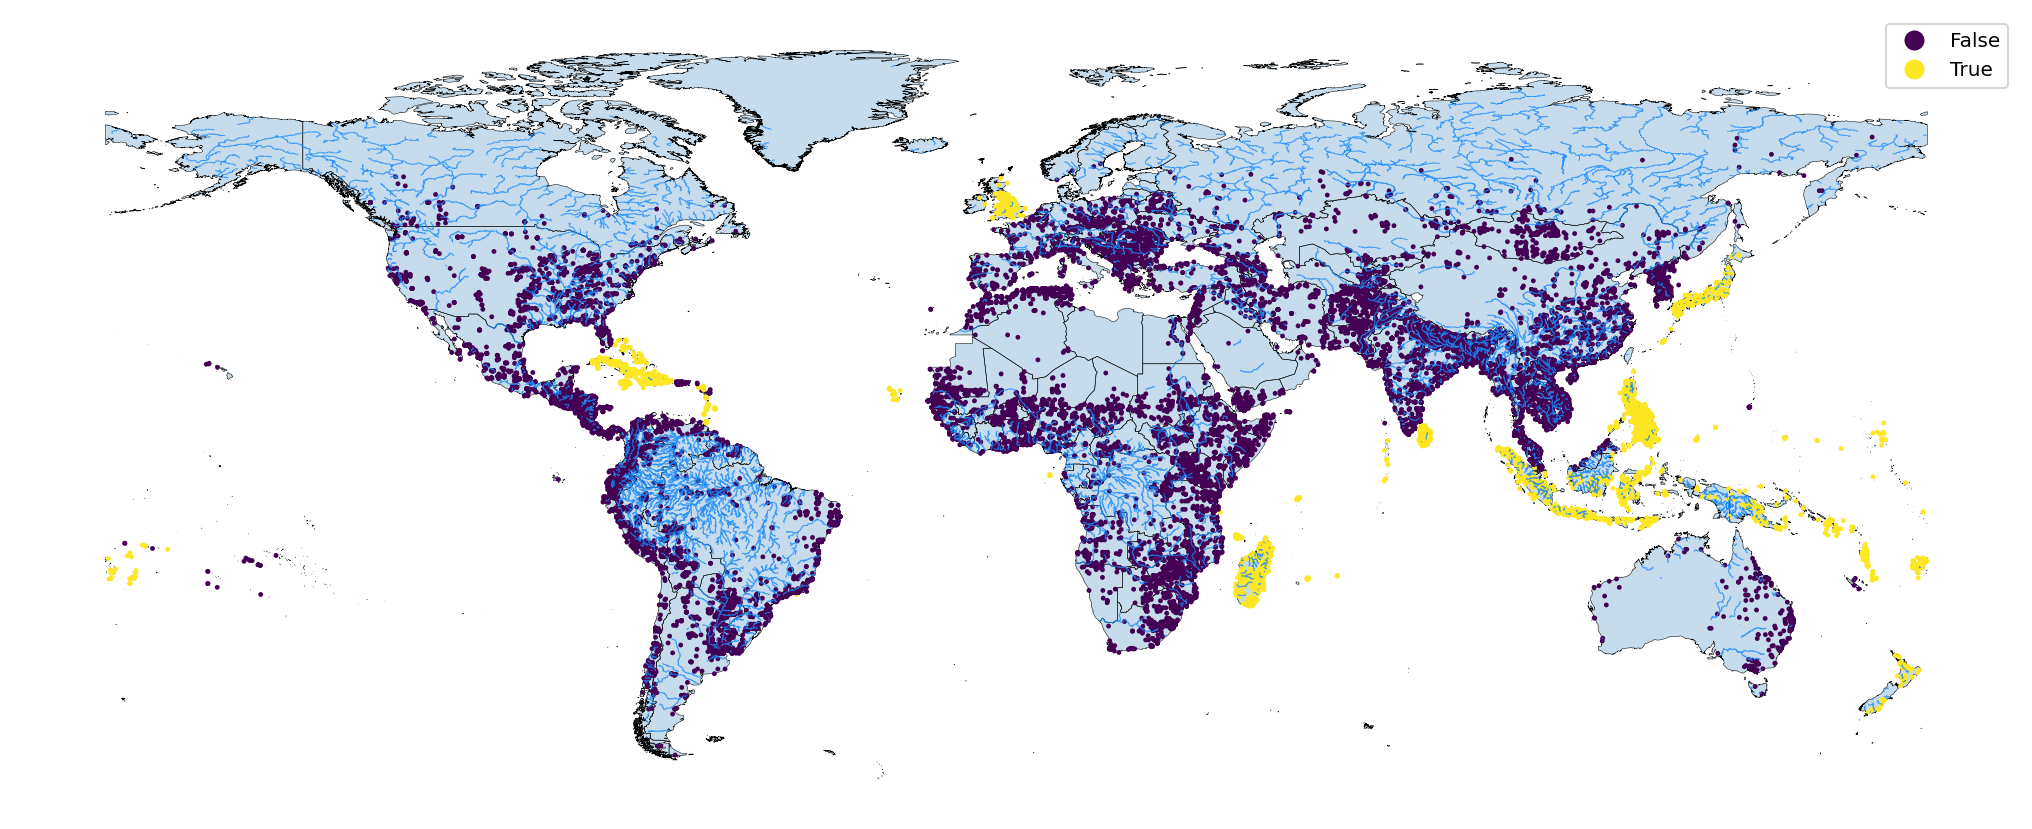

In [11]:
fig, ax = plt.subplots(figsize=(14, 9), dpi=144)
world.plot(facecolor='tab:blue', alpha=0.25, ax=ax)
world.plot(facecolor='none', edgecolor='k', lw=0.25, ax=ax)
rivers.plot(edgecolor='dodgerblue', lw=0.5, ax=ax)

data.dropna(subset='disaster_class').plot('is_island', 
                                      markersize=2, 
                                      ax=ax, 
                                      legend=True, 
                                      categorical=True,
                                      cmap='viridis')
ax.axis('off')
plt.show()

# Synthetic Data

Create a bunch of dummy datapoints with geospatial features. These will be non-disasters. The model will need to distinguish the real disaster data from these fake points.

In [14]:
from laos_gggi.data_functions.disaster_point_data import load_synthetic_non_disaster_points
not_disasters = load_synthetic_non_disaster_points(by='country', multiplier=3)
merged_df = pd.concat([not_disasters.assign(is_disaster = 0), 
                       data.reset_index().assign(is_disaster=1)], 
                      ignore_index= True)

Loading data found at /mnt/c/users/Jesse/Python Projects/laos-climate-change/data/synthetic_non_disasters_country_times_3.csv


#  Review Results

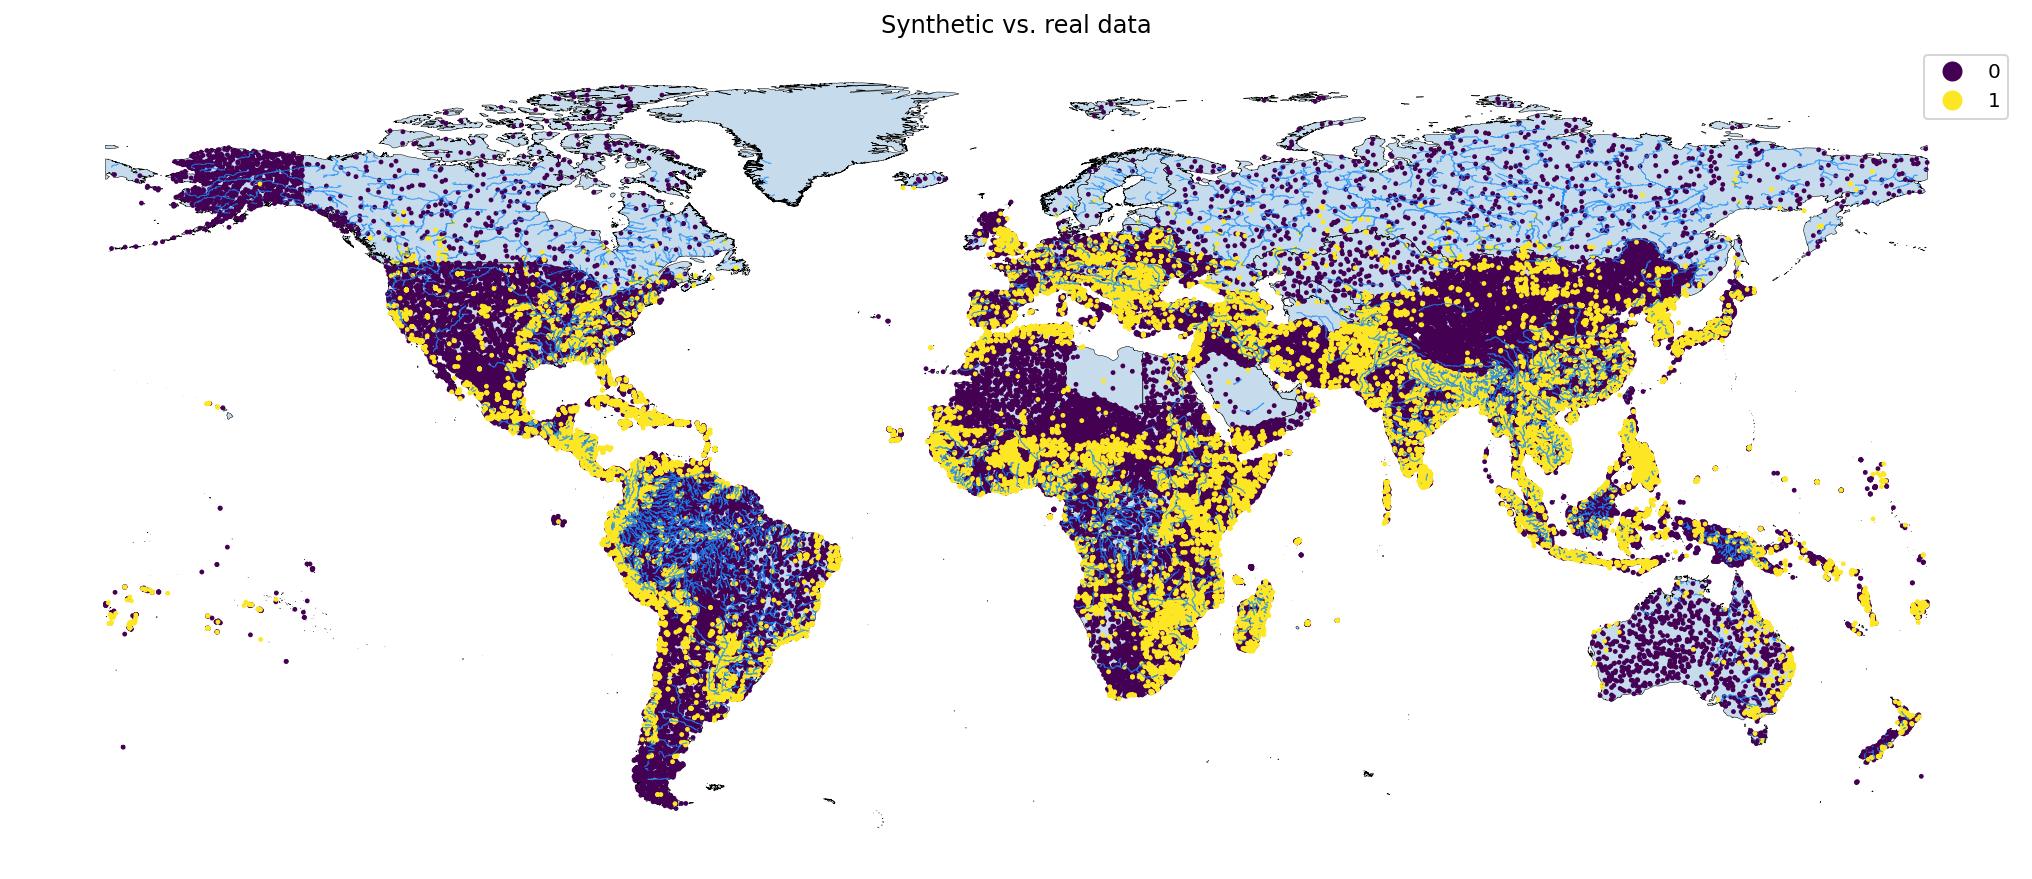

In [15]:
fig, ax = plt.subplots(figsize=(14, 9), dpi=144)
world.plot(facecolor='tab:blue', alpha=0.25, ax=ax)
world.plot(facecolor='none', edgecolor='k', lw=0.25, ax=ax)
rivers.plot(edgecolor='dodgerblue', lw=0.5, ax=ax)

merged_df.plot('is_disaster', 
        markersize=2, 
        ax=ax, 
        legend=True, 
        categorical=True,
        cmap='viridis')
ax.axis('off')
plt.title("Synthetic vs. real data")
plt.show()

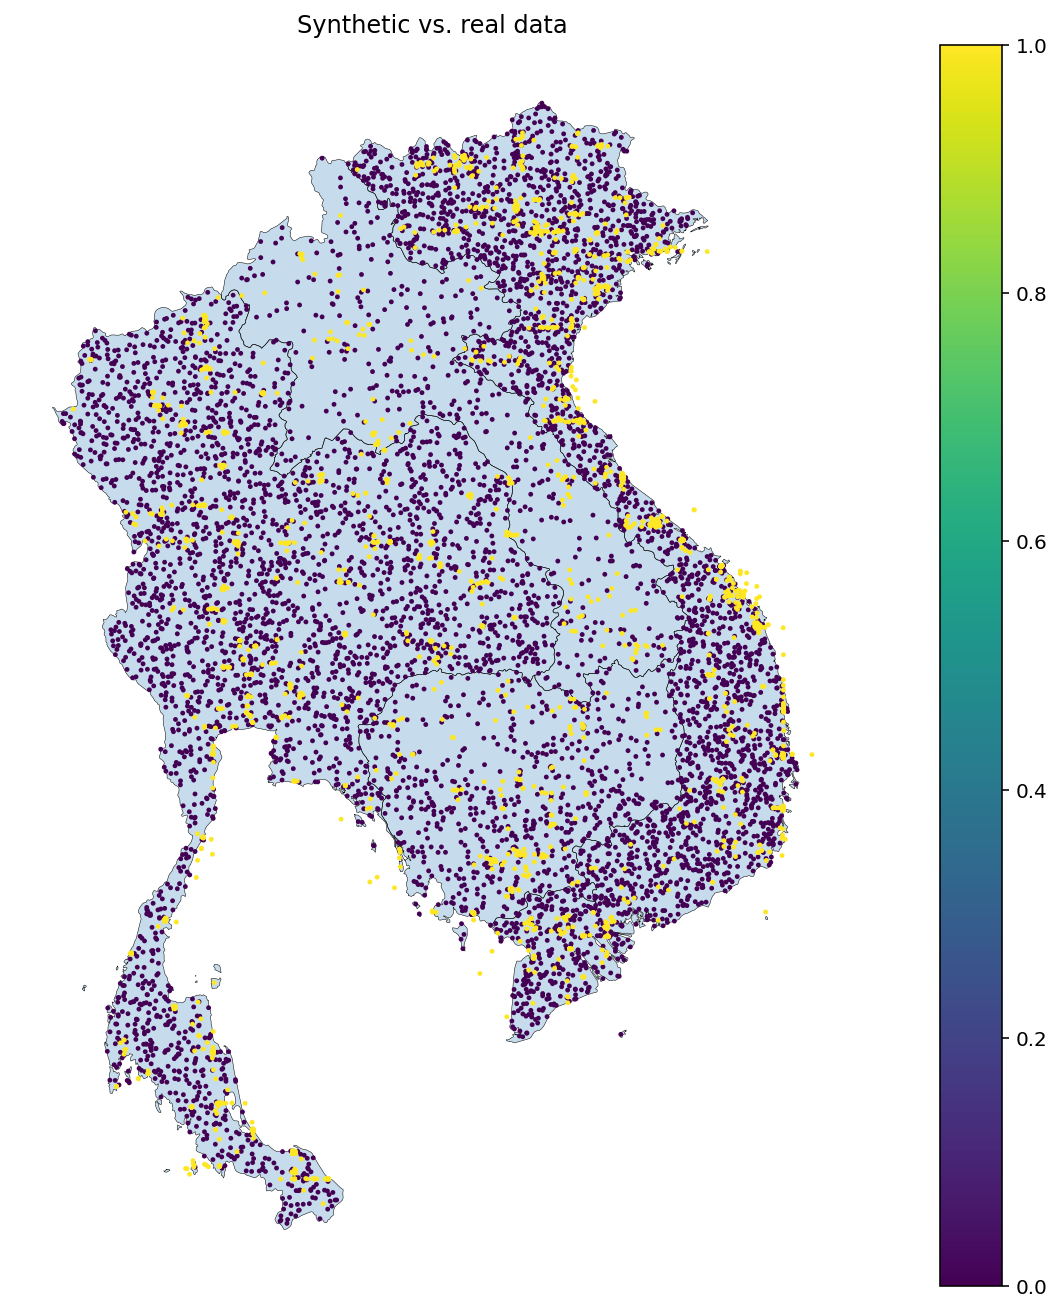

In [17]:
laos_neighboors = ["LAO", "VNM", "KHM", "THA"]
laos_neighboors_df = merged_df.query('ISO in @laos_neighboors')


fig, ax = plt.subplots(figsize=(14, 9), dpi=144)
world.query('ISO_A3 in @laos_neighboors ').plot(facecolor='tab:blue', alpha=0.25, ax=ax)
world.query('ISO_A3 in @laos_neighboors ').plot(facecolor='none', edgecolor='k', lw=0.25, ax=ax)
# rivers.plot(edgecolor='dodgerblue', lw=0.5, ax=ax)

laos_neighboors_df.plot('is_disaster', 
                                      markersize=2, 
                                      ax=ax, 
                                      legend=True, 
                                      # categorical=True,
                                      cmap='viridis')
ax.axis('off')
plt.title("Synthetic vs. real data")
plt.show()

In [18]:
pd.merge(laos_neighboors_df.query('is_disaster == 0').value_counts("ISO"),
         laos_neighboors_df.query('is_disaster == 1').value_counts("ISO"), left_index=True, right_index=True).rename(
    columns = {"count_x": 'no_disaster', "count_y": "disaster"}
         )

no_disaster  disaster
ISO                       
THA         2817       939
VNM         2778       926
KHM          582       194
LAO          363       121